In [1]:
%run ./utils.py

In [2]:
dbname = "muraro"
n_gfm = 5
expr_df, cell_type = load_data(dbname)
print(f"Database: {dbname}\tCells: {expr_df.shape[0]}\tGenes: {expr_df.shape[1]}")
expr_df = expr_df.astype(float)
adata = preprocess(expr_df=expr_df, cell_type=cell_type, highly_genes=8000)
x, raw_x = adata.X, adata.raw.X
y = lab2fac(adata.obs["cell_type"].to_numpy())

Database: muraro	Cells: 2122	Genes: 19046


In [3]:
# Calculate gfm extension threshold cutoff
gfms = [load_gfm(dbname,i) for i in range(n_gfm)]
cutoffs = [get_cutoff(adata,gfm) for gfm in gfms]
cfstr = ",".join([str(_) for _ in cutoffs])
print(cfstr)

0.14,0.14,0.15,0.14,0.14


In [4]:
# Use scMUG for training, the results will be saved in ./outputs/
!python3 scMUG.py --dataset muraro --cluster_number 7 --n_gfm 5 --cutoffs 0.14,0.14,0.15,0.14,0.14 --seeds 1111,2222,3333,4444,5555,6666,7777,8888,9999,10000


Database: muraro	Cells: 2122	Genes: 19046

Seed: 1111

GFM: 1
Epoch [100/100], Loss: 17.9706
GFM: 2
Epoch [100/100], Loss: 18.2073
GFM: 3
Epoch [100/100], Loss: 18.5358
GFM: 4
Epoch [100/100], Loss: 17.7560
GFM: 5
Epoch [100/100], Loss: 18.3262

Round 0
dbname:muraro	round:1111	alpha:0	beta:1	acc: 0.94769 	ari: 0.9146 	nmi: 0.87452
dbname:muraro	round:1111	alpha:0.001	beta:1	acc: 0.94769 	ari: 0.91529 	nmi: 0.87529
dbname:muraro	round:1111	alpha:0.01	beta:1	acc: 0.94769 	ari: 0.91668 	nmi: 0.87755
dbname:muraro	round:1111	alpha:0.1	beta:1	acc: 0.94769 	ari: 0.91642 	nmi: 0.87819
dbname:muraro	round:1111	alpha:1	beta:1	acc: 0.94769 	ari: 0.91642 	nmi: 0.87819
dbname:muraro	round:1111	alpha:1	beta:0.1	acc: 0.94769 	ari: 0.91642 	nmi: 0.87819
dbname:muraro	round:1111	alpha:1	beta:0.01	acc: 0.94769 	ari: 0.91642 	nmi: 0.87819
dbname:muraro	round:1111	alpha:1	beta:0.001	acc: 0.94769 	ari: 0.91642 	nmi: 0.87819
dbname:muraro	round:1111	alpha:1	beta:0	acc: 0.94769 	ari: 0.91642 	nmi: 0.87819

In [5]:
# load the latent value generated by scMUG
lats = joblib.load(f"./outputs/{dbname}_latents.joblib")
print("random seed, cell number, GFM number, latent dimensions: ", np.array(lats).shape) 

random seed, cell number, GFM number, latent dimensions:  (10, 2122, 5, 32)


Shape of latent: (5, 2122, 32)


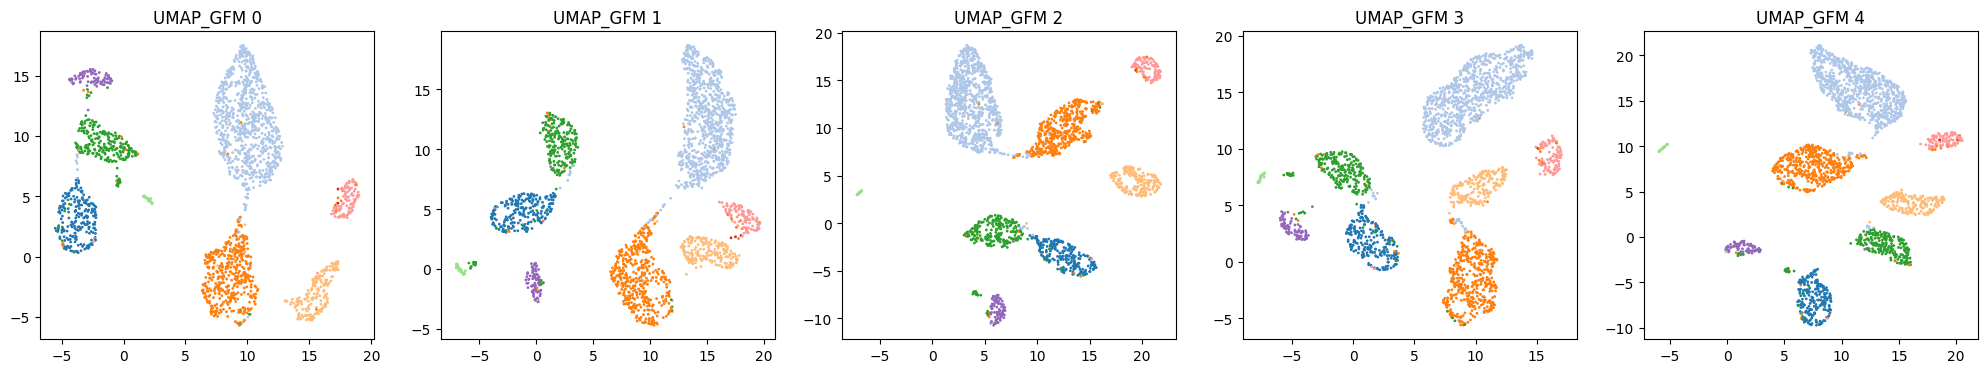

In [6]:
# choose the latent value under different GFM
latent = lats[4].transpose(1, 0, 2)  
print("Shape of latent:", latent.shape)
# visualization with umap 
fig = u_map(latent,y,title="UMAP_GFM")

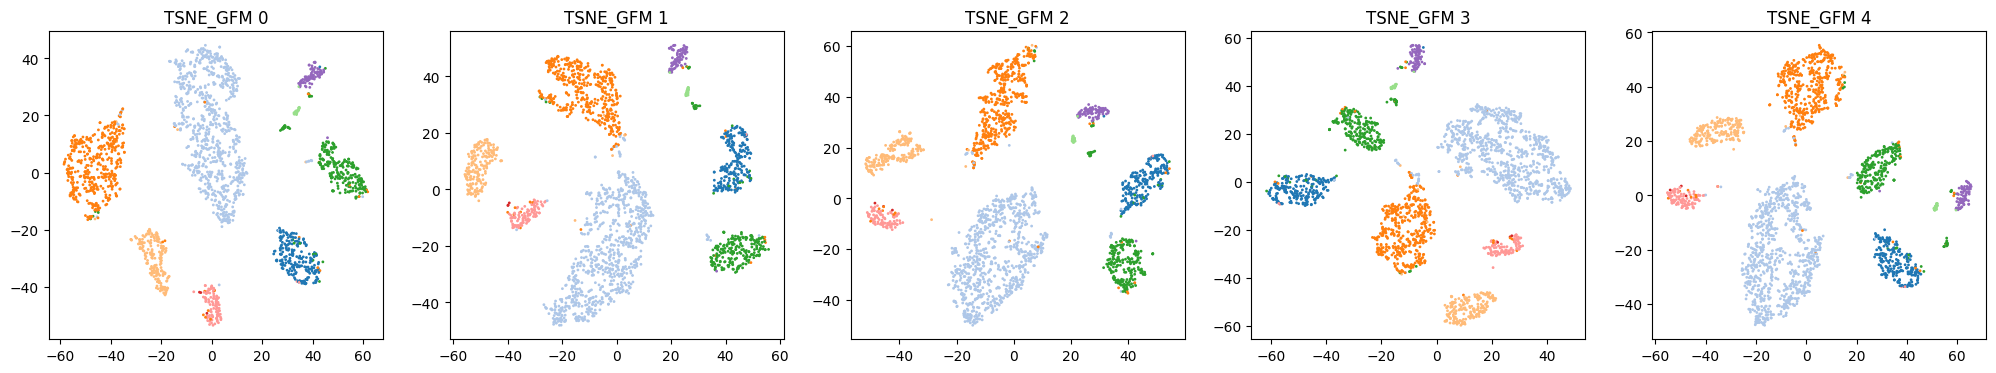

In [7]:
# visualization with t-sne 
fig = t_sne(latent,y,title="TSNE_GFM")

Shape of latent: (10, 2122, 160)


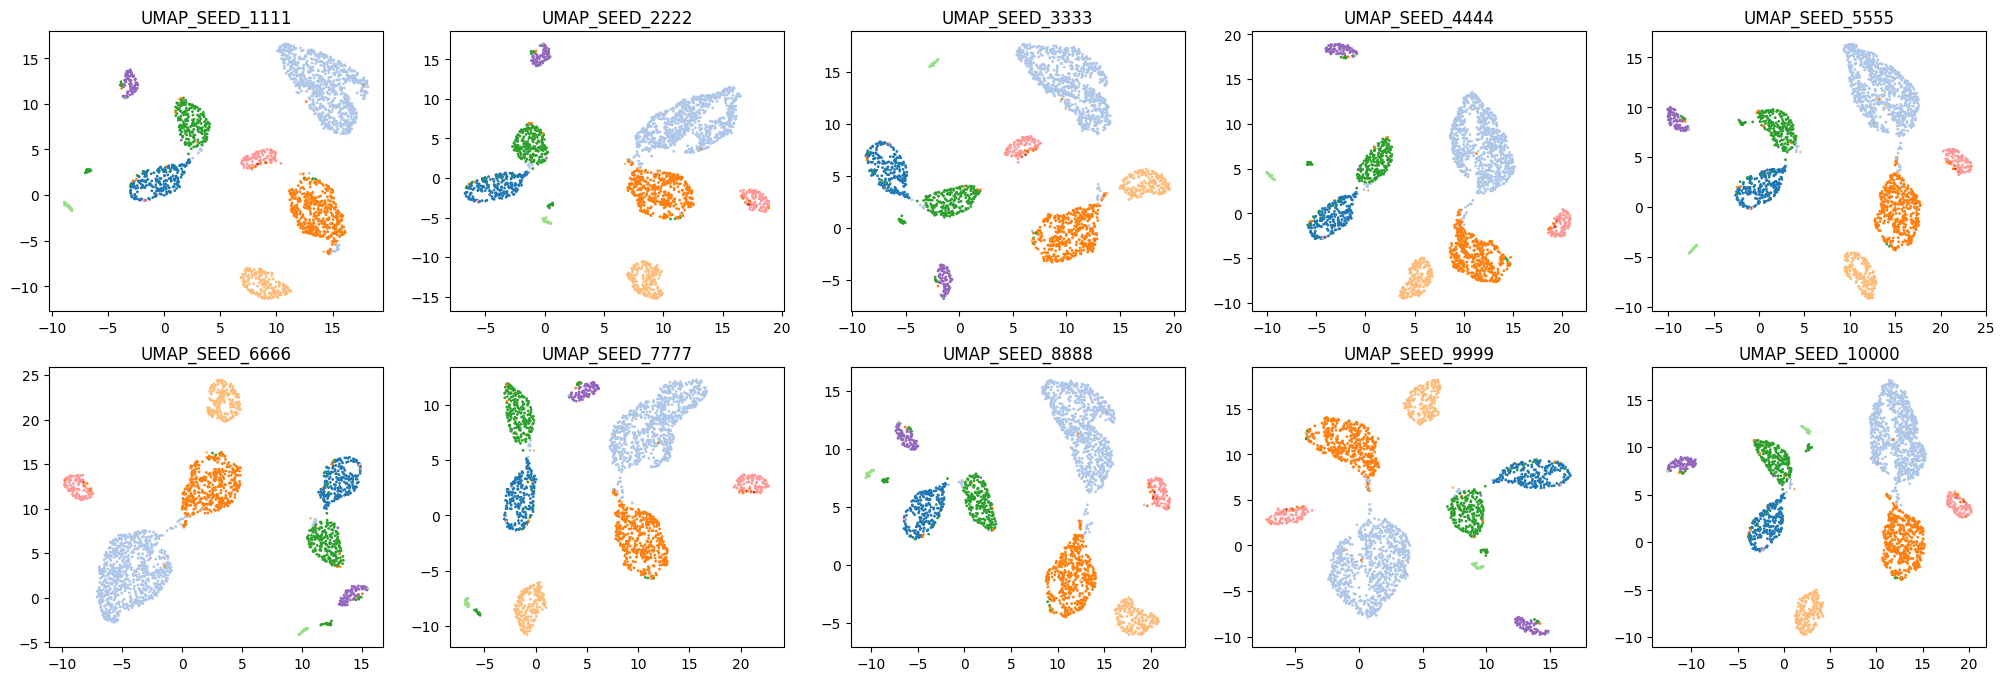

In [8]:
# choose the latent value under different random seeds
seed_number = len(lats) 
cell_number = len(lats[0])
latent = np.array([lats[i].reshape((cell_number,-1)) for i in range(seed_number)])
print("Shape of latent:", latent.shape)
# visualization with umap 
seeds = [1111,2222,3333,4444,5555,6666,7777,8888,9999,10000]
title = [f"UMAP_SEED_{seed}" for seed in seeds]
fig = u_map(latent,y,title=title)

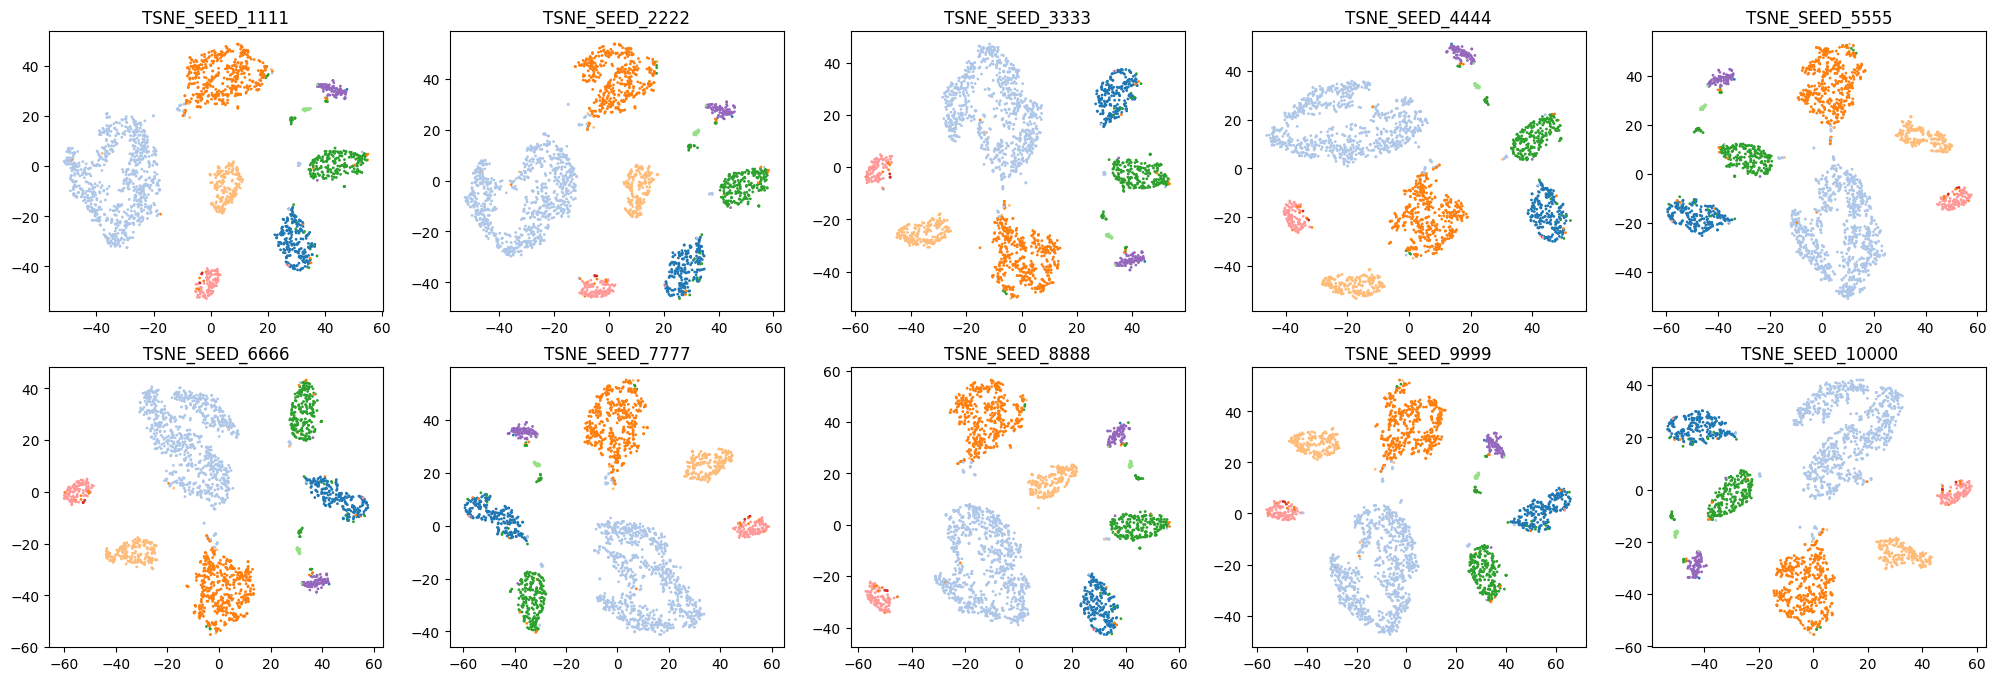

In [9]:
# visualization with t-sne 
title = [f"TSNE_SEED_{seed}" for seed in seeds]
fig = t_sne(latent,y,title=title)